# Data Science Introduction

**Week 9**, April 14, 2025

Lecture: Regression, Classification, Clustering

Off topic: 
 - excel2latex - thesis tools
 - md files to latex

## What is Data Science?

- **Data Science** involves extracting meaningful insights from large datasets using various tools and techniques. It includes data collection, cleaning, processing, analysis, and visualization.
- For **economists**, data science can be used to understand economic trends, analyze policy impacts, forecast future economic conditions, and make data-driven decisions.

## The Role of Python in Data Science

- Python is a versatile programming language with powerful libraries (e.g., Pandas, NumPy, Matplotlib, Scikit-learn) that make data processing, analysis, and visualization more accessible and efficient.
- Python allows economists to automate data processing tasks and create reproducible workflows, which is important for ensuring accuracy and consistency in economic research.

## Data Processing Pipeline in Economics

### 1: Importing and Cleaning Data

- Import data from various sources (CSV, Excel, databases) and perform basic cleaning, such as removing duplicates, handling missing values, and formatting data types.
    - **Example**: Import and clean a dataset on inflation rates or unemployment figures.

### 2: Exploratory Data Analysis (EDA)

- **EDA** involves summarizing the data, identifying patterns, and visualizing distributions. This is an important step to gain insights before performing more advanced analyses.
    - **Example**: Plot the distribution of unemployment rates across different countries to detect patterns or outliers.

### 3: Statistical Analysis

- Conduct statistical analyses to test hypotheses. Economists often perform tests like t-tests, chi-square tests, or ANOVA to understand the relationships between economic variables.
    - **Example**: Testing the hypothesis that a country's unemployment rate is significantly correlated with its GDP growth.

### 4: Building and Evaluating Models

- Use machine learning models (e.g., linear regression, decision trees) to predict or classify economic outcomes.
    - **Example**: Forecasting inflation based on historical data or predicting economic growth using a set of features (investment, government spending).

### 5: Visualization and Reporting

- Create effective visualizations (e.g., line graphs, bar charts, scatter plots) and generate reports to communicate your findings clearly.
    - **Example**: Create a report that outlines the predicted GDP growth for the next year based on the current dataset, with supporting visualizations.

## Important Considerations for Economists and Economics Students

- Data Quality and Reliability
  - **Economists must ensure the quality of their data**, as poor data leads to misleading conclusions. This involves cleaning the data, checking for biases, and ensuring that the sources are reliable.
      - **Important**: Be cautious about data collection methods (e.g., surveys, government reports) and consider potential sources of bias (e.g., non-response bias).

- Interpreting Results
  - **Contextualizing Results**: It's crucial for economists to interpret the results of data analysis in the context of economic theory and real-world dynamics. For instance, predicting GDP growth isn't just about fitting a model but understanding the underlying economic forces.
  - **Model Limitations**: Models may be useful for prediction but don't always capture all nuances of the economic reality. Be aware of overfitting, underfitting, and the assumptions underlying models.

- Ethical Considerations
  - **Ethical Use of Data**: Economists should be aware of the ethical implications of using data, especially when working with sensitive information. Issues like data privacy, fairness, and transparency should be considered.

- Reproducibility
  - **Reproducible Workflows**: All analyses should be reproducible, meaning someone else with access to the same data and code can replicate your results. This is essential for ensuring the credibility of economic research.

## Data Science Tools

* Python as a "go-to" language for data science (DS) / machine learning because of its (open-source) libraries
* we've seen `pandas` for powerful data manipulation and `numpy` for numerical computations, but this is far from what Python has to offer for DS
* we need tools for typical DS tasks such as **Regression**, **Classification**, **Clustering**

* to name a few data-science libraries (in no particular order)
    * [scikit-learn]()
        * supervised vs. unsupervised learning
        * validation 
        * evaluation
        * CPU optimized

    * [scipy]()
        * optimization algorithms
        * statistics
        * fourier transforms

    * [torch]() / [tensorflow]() (+ [keras]())
        * neural networks
        * GPU optimized 
        * state-of-the-art for NLP/vision/...
    * [lightgbm]() / [xgboost]() / [catboost]()
        * tree methods
        * state-of-the-art for tabular datasets

* we will look at scikit-learn and lightgbm using some [toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html)

* we will not focus on the algorithmic/estimation part of the models but on the programming side

* [mlflow](https://mlflow.org/) is a great platform which can help you in different parts of your ML/DS lifecycle, e.g.
    * tracking experiments
    * package DS projects
    * register and deploy trained models

* [kaggle](https://www.kaggle.com/) great resource to see the state-of-the-art approaches and methods to different problems

* [huggingface.io](https://huggingface.co) machine learning models and data


In [2]:
# !pip3 install scikit-learn

In [3]:
import pandas as pd
import sklearn 
import sklearn.datasets
from typing import List, Dict, Union

import lightgbm
import matplotlib.pyplot as plt
# retina matplotlib for better quality plots
%config InlineBackend.figure_format = 'retina'

## Scikit-learn 

* contains implementations of a number of ML algorithms - called **estimators**
* estimators typically have a standardized method names / attributes - e.g. `.fit()` and `.predict()` methods


### Regression (California housing)

* was going to use [boston housing prices dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset), which is a standard but apparently there are some [ethical concerns]()

In [4]:
sklearn.datasets.load_boston()['DESCR'];

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


* we will use California house prices dataset

In [5]:
sklearn.datasets.fetch_california_housing().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
data_raw = sklearn.datasets.fetch_california_housing()

In [7]:
data_raw

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [8]:
print(data_raw['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [9]:
sklearn.datasets.fetch_california_housing()['target_names']

['MedHouseVal']

In [10]:
label = pd.Series(data_raw['target'], name = data_raw['target_names'][0]) # target is the median house value for California districts

In [11]:
label

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [12]:
df = pd.DataFrame(data_raw['data'], columns = data_raw['feature_names']) # predictors

In [13]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
df.isnull().mean()

MedInc        0.0
HouseAge      0.0
AveRooms      0.0
AveBedrms     0.0
Population    0.0
AveOccup      0.0
Latitude      0.0
Longitude     0.0
dtype: float64

In [15]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [16]:
df.shape

(20640, 8)

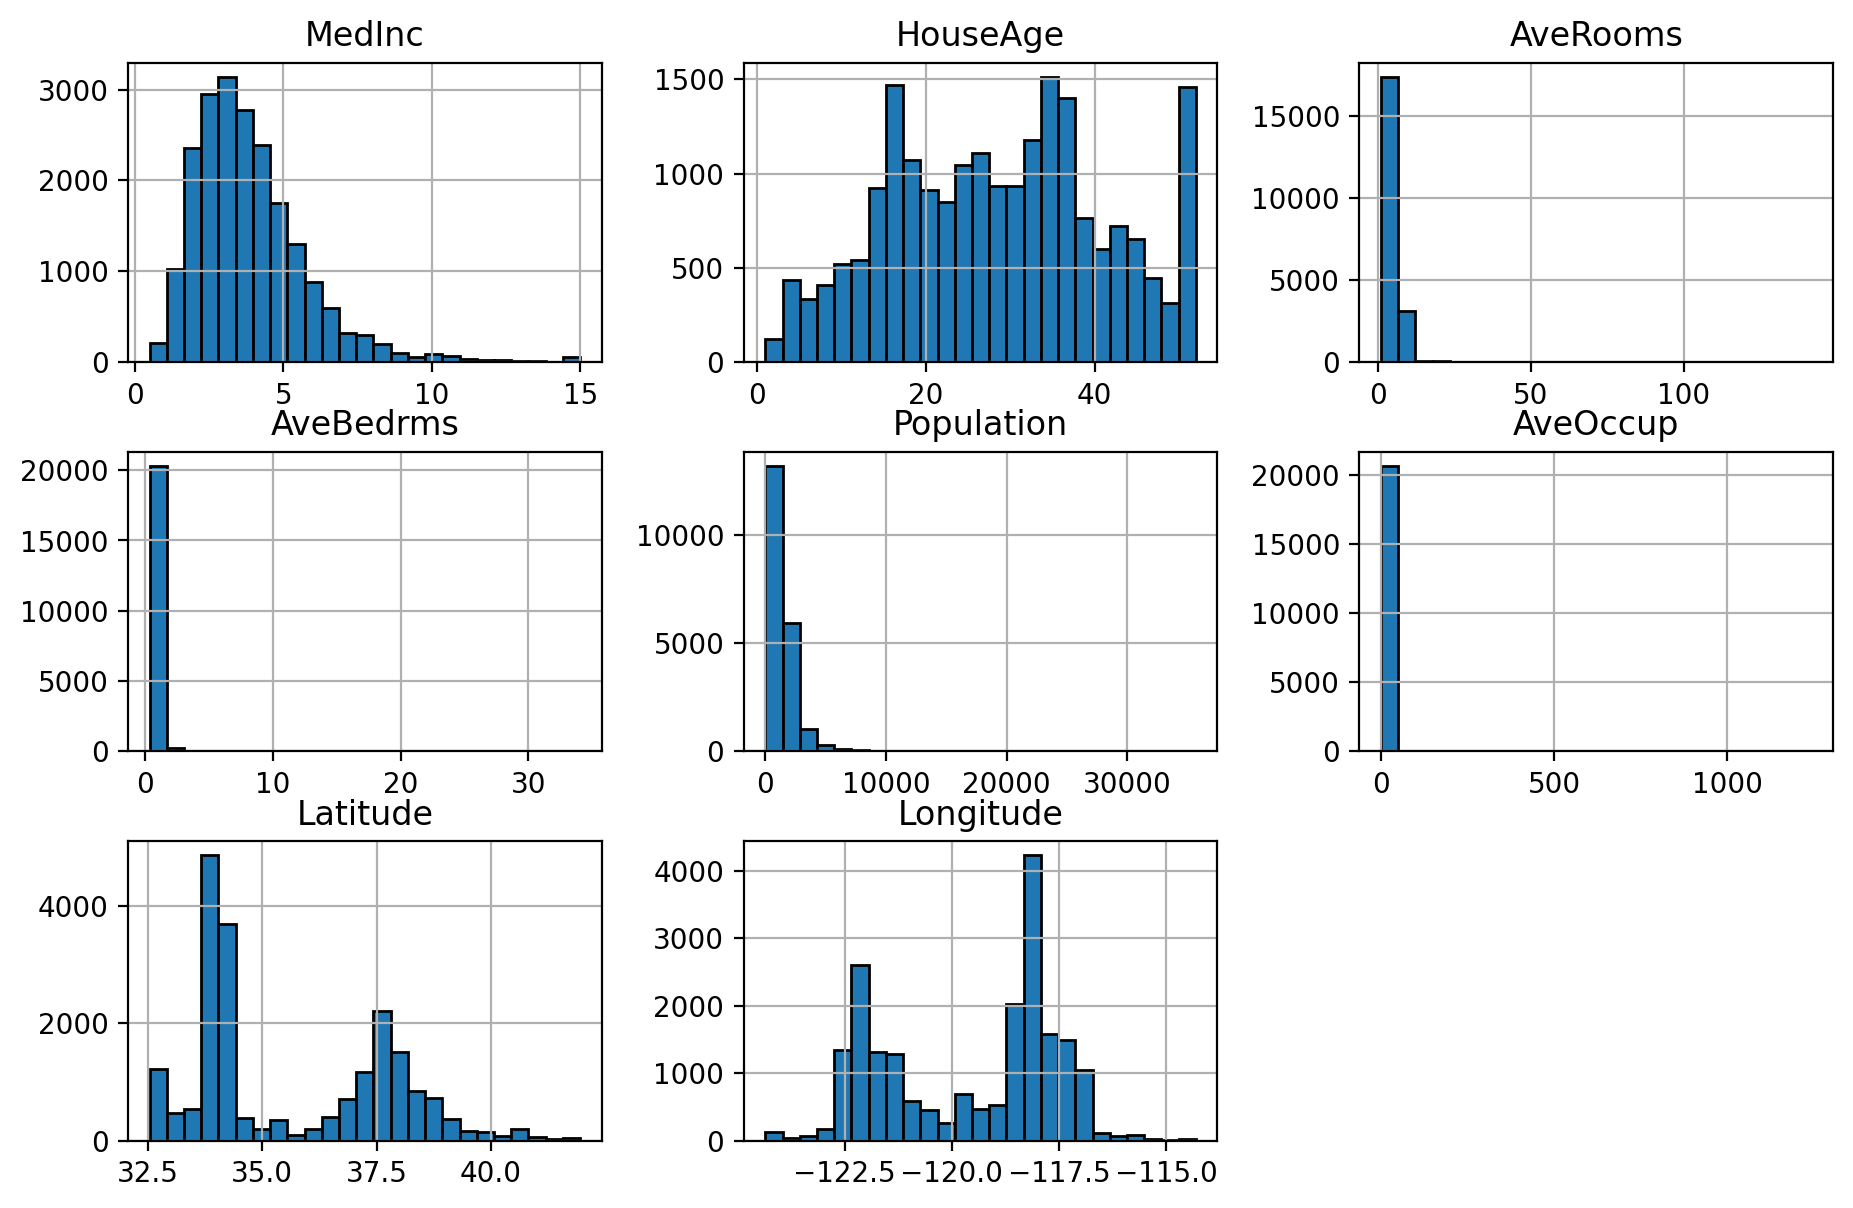

In [17]:
df.hist(figsize=(11, 7), bins=25, edgecolor="black")
plt.subplots_adjust(hspace=0.3, wspace=0.3)

- We want to be able to predict the prices of unseen houses
    - "explainning"/overfitting the already seen data is very easy with high capacity models (e.g. trees, neural nets, etc.)
- To achieve this, we usually split the available data according to some validation scheme
- Validation scheme needs to respect the nature of a forecasting problem 
    - cross-validation 
    - temporal validation

- You can use `sklearn` validation utils for standard tasks or write your own for more exotic
- Don't forget to set `random_state` so that your results can be reproduced

In [18]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
df[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


We could make a scatter plot where the x- and y-axis would be the latitude and longitude and the circle size and color would be linked with the house value in the district.

In [19]:
california_housing = sklearn.datasets.fetch_california_housing(as_frame=True)
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [20]:
df.head() # our previous dataframe

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


<Axes: >

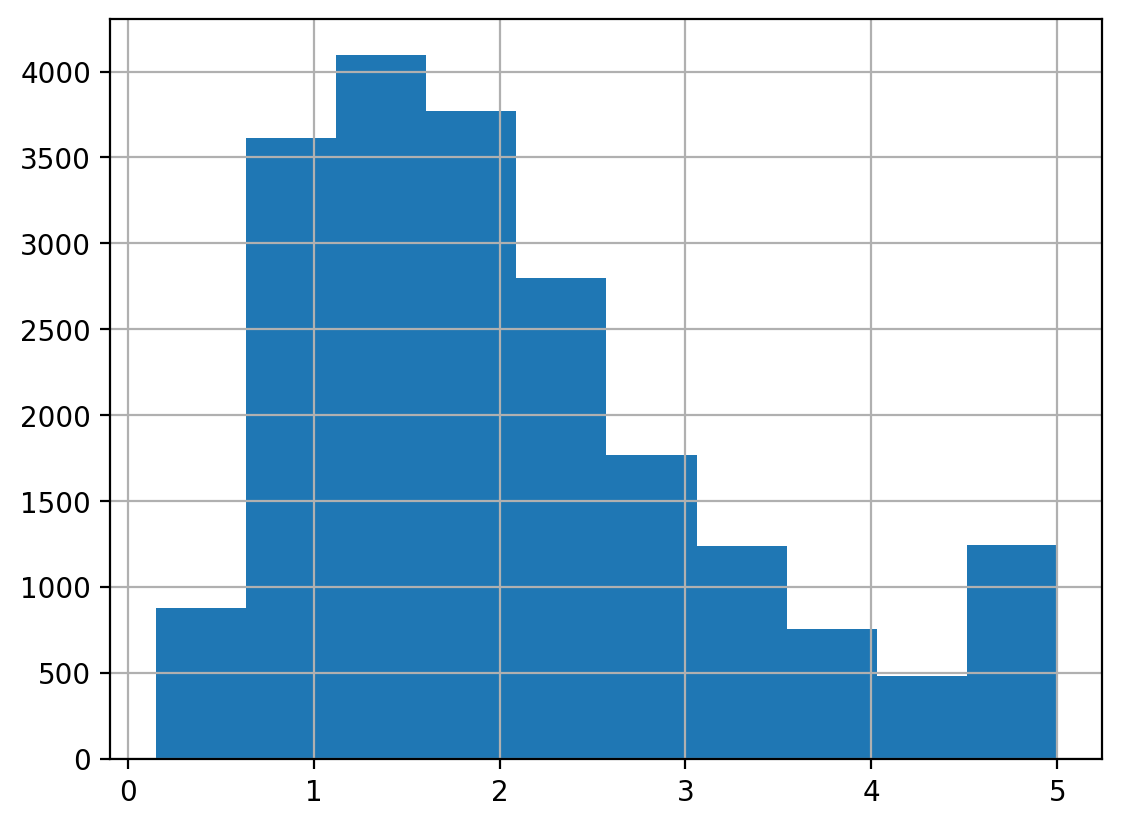

In [21]:
california_housing.frame["MedHouseVal"].hist() # the target variable

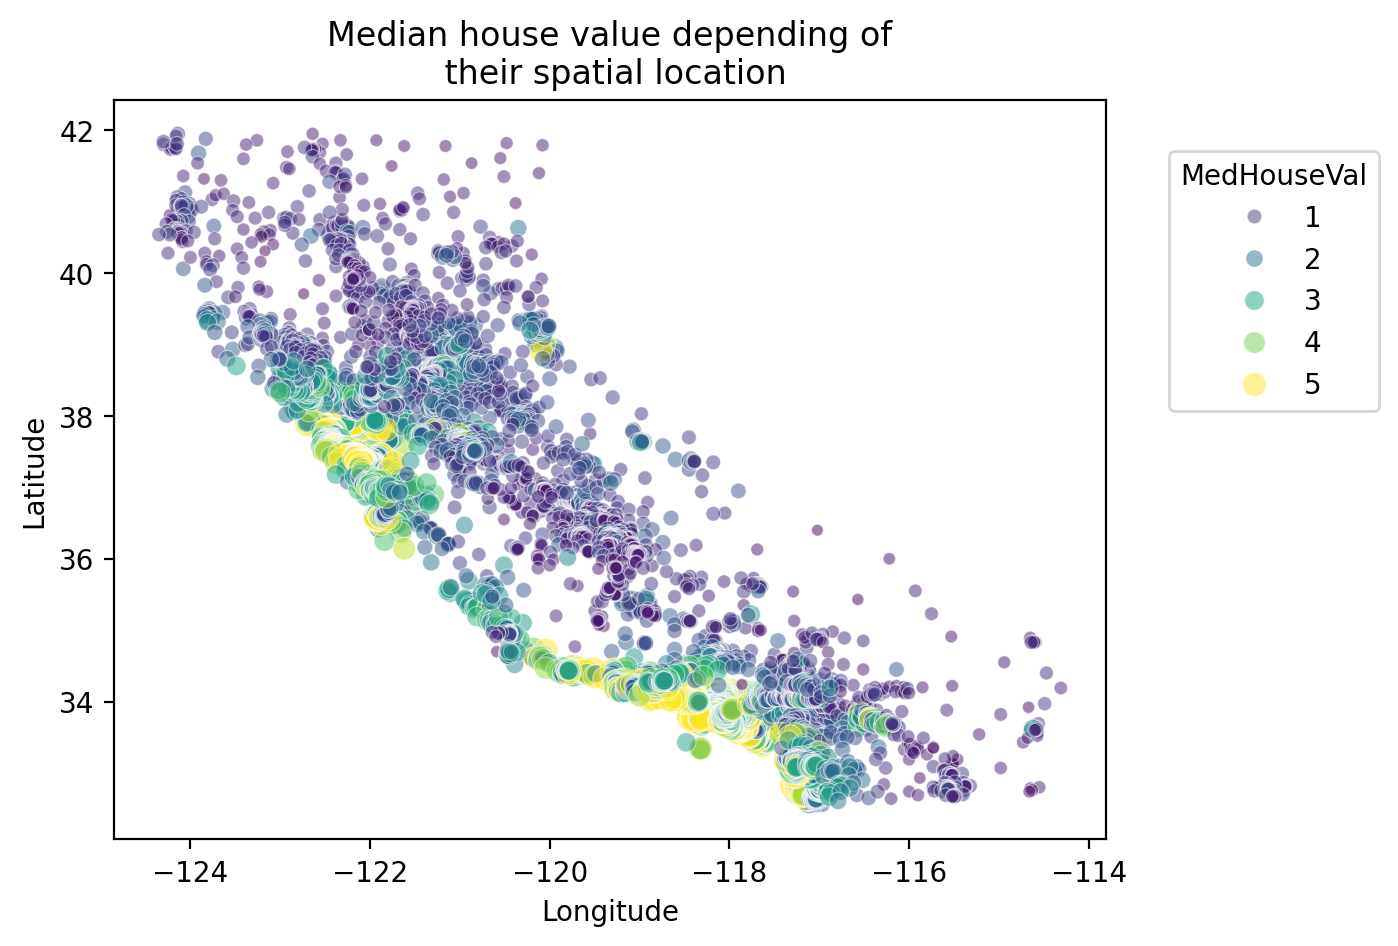

In [22]:
import seaborn as sns
sns.scatterplot(
    data=california_housing.frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

### Split data 

In [23]:
# simple random split using sklearn
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df, label, test_size = 0.3, random_state = 42)

In [24]:
print(df.shape, X_train.shape, X_test.shape);

(20640, 8) (14448, 8) (6192, 8)


- Machine learning models have number of hyperparameters that need to be tweaked
    - searching for optimal using only in-sample (seen) data not good
    - using test-set from above leads to "overfitting" on the test set
- Typical solution is to introduce so called validation set used only for evaluating hyperparameters
    - splitting dataset into 3 parts however makes our dataset we can learn from drastically smaller 
- Cross-validation (or temporal validation)
    - cross validation iterators are handy and return the indices of the original dataframes 


In [25]:
kf5 = sklearn.model_selection.KFold(n_splits = 5)

KFold(n_splits=5, random_state=None, shuffle=False)

In [27]:
data = pd.concat([df, label], axis = 1)

In [28]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [29]:
i = 0
for train_idx, test_idx in kf5.split(data):

    print(f'Split no. {i}')
    print(train_idx, test_idx)

    train_data = data.loc[train_idx,:]
    test_data = data.loc[test_idx,:]
    i=i+1

Split no. 0
[ 4128  4129  4130 ... 20637 20638 20639] [   0    1    2 ... 4125 4126 4127]
Split no. 1
[    0     1     2 ... 20637 20638 20639] [4128 4129 4130 ... 8253 8254 8255]
Split no. 2
[    0     1     2 ... 20637 20638 20639] [ 8256  8257  8258 ... 12381 12382 12383]
Split no. 3
[    0     1     2 ... 20637 20638 20639] [12384 12385 12386 ... 16509 16510 16511]
Split no. 4
[    0     1     2 ... 16509 16510 16511] [16512 16513 16514 ... 20637 20638 20639]


* Typical situation arises when you need to respect certain classes/groups in the data during splitting process
    * use `GroupKFold` data for this
* To respect time-series nature of the problem, you can use `TimeSeriesSplit`


* We want to fit the model using the train data in each fold and predict the test data in each fold
    * we can start with the simplest "model" -> sample mean


In [30]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [32]:
label = 'MedHouseVal'
kf_predictions = pd.DataFrame()

i = 0
for train_idx, test_idx in kf5.split(data):
    print(f'split no. {i}')
    train_data = data.loc[train_idx,:]
    test_data = data.loc[test_idx,:]

    # "fitting" part
    sample_mean = train_data[label].mean()
    print(f'sample mean: {sample_mean}')
    # prediction part 
    test_data['prediction'] = sample_mean

    # save predictions
    test_data['split'] = i
    kf_predictions = pd.concat([kf_predictions, test_data], axis = 0)
    i = i + 1 

split no. 0
sample mean: 2.164930289486434
split no. 1
sample mean: 2.034871020469961
split no. 2
sample mean: 1.9952903197674416
split no. 3
sample mean: 2.1270289026162787
split no. 4
sample mean: 2.02067031310562


- We have our first predictions, even though simple ones
- NOTE: when you have large data that don't fit into RAM, you can do the forecasting/predicting "lazily"
    - save individual split results or save only split-metrics 


In [33]:
kf_predictions

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,prediction,split
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2.16493,0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,2.16493,0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.16493,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.16493,0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.16493,0
...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,2.02067,4
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,2.02067,4
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,2.02067,4
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,2.02067,4


### Evaluation

- regression task:
    - typically MSE, MAE, MAPE, wMAPE or r2
- evaluation strategy should take into account what stakeholder wants, the kitchen-sink approach not recommended
- we are interested in out-of-sample!
    - sometimes it is interesting to look at in-sample and compare errors in-sample vs out-of-sample
- scikit-learn offers number of most commonly used metrics, see [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

- `kf_predicitions` contains out-of-sample predictions from individual splits (even though for now these are simply sample means)
    * we can look at the overall score as well as specific splits (shows stability)

In [34]:
kf_predictions

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,prediction,split
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2.16493,0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,2.16493,0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.16493,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.16493,0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.16493,0
...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,2.02067,4
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,2.02067,4
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,2.02067,4
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,2.02067,4


In [35]:
split_results = pd.concat([
    kf_predictions.groupby(['split']).apply(lambda x: sklearn.metrics.mean_squared_error(x[label], x['prediction']), include_groups=False),
    kf_predictions.groupby(['split']).apply(lambda x: sklearn.metrics.mean_absolute_error(x[label], x['prediction']), include_groups=False),
    kf_predictions.groupby(['split']).apply(lambda x: sklearn.metrics.r2_score(x[label], x['prediction']), include_groups=False),
    ], axis = 1)
split_results.columns = ['MSE','MAE', 'r2']

In [36]:
split_results

,MSE,MAE,r2
split,,,
0,1.306462,0.971558,-0.216137
1,1.198934,0.794484,-0.024237
2,1.572735,0.944996,-0.093293
3,1.258655,0.939208,-0.072854
4,1.514490,0.974571,-0.039344


* now we have a basic modelling workflow implemented and we can fit an actual model
* models/estimators in scikit-learn have standardized methods which provides great modularity
    * we will see in a couple of minutes, that we can simply switch one model from another and reuse the whole pipeline!

* `.fit(X,y)`
    * `X` - sample matrix (n_samples, n_features)
    * `y` - the target values y which (e.g. real numbers for regression, or ints for classification)
        * `y` not specified for the regression tasks 

* `.predict(X)`
    * 

* lets replace the sample mean with some econometrics model

In [37]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [38]:
label

'MedHouseVal'

In [39]:
import sklearn.linear_model

features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
labels = ['MedHouseVal']


kf_predictions = pd.DataFrame()
i = 0
for train_idx, test_idx in kf5.split(data):
    print(f'split no. {i}')
    train_data = data.loc[train_idx,:]
    test_data = data.loc[test_idx,:]

    # "fitting" part
    model = sklearn.linear_model.LinearRegression()
    model.fit(train_data[features], train_data[label]) # X , y

    # prediction part 
    test_data['prediction'] = model.predict(test_data[features])

    # save predictions
    test_data['split'] = i
    kf_predictions = pd.concat([kf_predictions, test_data], axis = 0)
    i = i + 1 

split no. 0
split no. 1
split no. 2
split no. 3
split no. 4


In [40]:
# evaluate
split_results = pd.concat([
    kf_predictions.groupby(['split']).apply(lambda x: sklearn.metrics.mean_squared_error(x[label], x['prediction']), include_groups=False),
    kf_predictions.groupby(['split']).apply(lambda x: sklearn.metrics.mean_absolute_error(x[label], x['prediction']), include_groups=False),
    kf_predictions.groupby(['split']).apply(lambda x: sklearn.metrics.r2_score(x[label], x['prediction']), include_groups=False),
    ], axis = 1)
split_results.columns = ['MSE','MAE', 'r2']

In [42]:
kf_predictions

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,prediction,split
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.255142,0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,4.058447,0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.811033,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.401180,0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.570520,0
...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0.106526,4
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0.530404,4
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0.143845,4
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0.295102,4


In [41]:
split_results

,MSE,MAE,r2
split,,,
0,0.484859,0.545994,0.548663
1,0.622497,0.566178,0.468207
2,0.646210,0.576550,0.550784
3,0.543200,0.531906,0.536987
4,0.494685,0.516853,0.660514


* using OLS instead of just looking at the mean helps a lot (of course)
* before trying another model, let's put above code into a function so it is reusable

In [43]:
def train_predict(data: pd.DataFrame, n_splits: int, features: List[str], label: str, model, model_args: Union[None,Dict]):
    """

    Args: 

    Returns:
    
    """

    kfold_predictions = pd.DataFrame()

    i = 0
    kfold = sklearn.model_selection.KFold(n_splits=n_splits)

    for train_idx, test_idx in kfold.split(data):

        train_data = data.loc[train_idx,:]
        test_data = data.loc[test_idx,:]

        # model initialization
        if model_args is not None:
            split_model = model(**model_args)
        else:
            split_model = model()

        # fit/estimate the model 
        split_model.fit(X = train_data[features], y = train_data[label])

        # prediction on unseen data using fit model
        test_data['prediction'] = split_model.predict(test_data[features])

        # save split name and  predictions
        test_data['split'] = i
        kfold_predictions = pd.concat([kfold_predictions, test_data], axis = 0)
        i = i + 1 

    return kfold_predictions

def eval_predicted(split_predictions: pd.DataFrame,label: str,eval_metrics = [sklearn.metrics.mean_squared_error, sklearn.metrics.r2_score]):

    split_results = pd.concat([
        split_predictions.groupby(['split']).apply(lambda x: eval_metric(x[label], x['prediction']), include_groups=False) for eval_metric in eval_metrics], axis = 1)
    split_results.columns = [m.__name__ for m in eval_metrics]

    return split_results 

In [ ]:
# we could pack 2 functions below into separate function
model_args = {'fit_intercept': True}
predictions = train_predict(
    data = data, n_splits = 5, 
    model = sklearn.linear_model.LinearRegression, 
    features = features, 
    label = label, 
    model_args = model_args)

eval_predicted(split_predictions = predictions, label =  'MedHouseVal', eval_metrics= [sklearn.metrics.mean_squared_error,sklearn.metrics.mean_absolute_percentage_error])

* now let's switch sklearn model for LGBM!
* our pipeline should still work (LGBM models also have `.fit()` and `.predict()`)

In [44]:
lgb_args = {
    'boosting_type': 'gbdt',
    'learning_rate': 0.1
}

predictions = train_predict(
    data = data, n_splits = 5, 
    model = lightgbm.LGBMRegressor, 
    features = features, 
    label = label, 
    model_args= lgb_args)

eval_predicted(split_predictions = predictions, label =  'MedHouseVal', eval_metrics= [sklearn.metrics.mean_squared_error,sklearn.metrics.mean_absolute_percentage_error])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.164930
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.034871
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start traini

,mean_squared_error,mean_absolute_percentage_error
split,,
0,0.370611,0.355926
1,0.348273,0.198146
2,0.361325,0.227280
3,0.362462,0.258604
4,0.453471,0.221525


* 2-times better with default hyperparamters!

   * NOTE: we maybe should teach more trees at IES!

* Let's look at another example, classification this time

## Code from link

https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

import numpy as np

In [47]:
alphas = np.logspace(-3, 1, num=30)
model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
cv_results = cross_validate(
    model,
    data_raw.data,
    data_raw.target,
    return_estimator=True,
    n_jobs=2,
    # cv=5, # default
)

In [49]:
cv_results

{'fit_time': array([0.01502299, 0.01480889, 0.00849986, 0.00896001, 0.00833797]),
 'score_time': array([0.00053191, 0.00055027, 0.00043392, 0.00043607, 0.00045681]),
 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('ridgecv',
                   RidgeCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-03, 2.59294380e-03,
         3.56224789e-03, 4.89390092e-03, 6.72335754e-03, 9.23670857e-03,
         1.26896100e-02, 1.74332882e-02, 2.39502662e-02, 3.29034456e-02,
         4.52035366e-02, 6.21016942e-02, 8.53167852e-02, 1.17210230e-01,
         1.61026203e-01, 2.21221629e-01, 3.03919538e-01, 4.17531894e-01,
         5.73615251e-01, 7.88046282e-01, 1.08263673e+00, 1.48735211e+00,
         2.04335972e+00, 2.80721620e+00, 3.85662042e+00, 5.29831691e+00,
         7.27895384e+00, 1.00000000e+01])))]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('ridgecv',
                   RidgeCV(alphas=array([1.00000000e-03, 1.

In [48]:
score = cv_results["test_score"]
print(f"R2 score: {score.mean():.3f} ± {score.std():.3f}")

R2 score: 0.553 ± 0.062


In [ ]:
# cv_results

In [50]:
#import pandas as pd
coefs = pd.DataFrame(
    [est[-1].coef_ for est in cv_results["estimator"]],
    columns=data_raw.feature_names,
)

In [51]:
coefs

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.835095,0.137634,-0.232678,0.269020,-0.011127,-0.044111,-0.900593,-0.919817
1,0.809158,0.123306,-0.229085,0.285179,-0.010079,-0.036773,-0.914145,-0.903505
2,0.804681,0.130626,-0.271615,0.297310,0.017083,-0.040505,-0.910459,-0.902460
3,0.838210,0.076919,-0.223102,0.266436,-0.015454,-0.038326,-0.832171,-0.738772
4,0.837510,0.121489,-0.319064,0.361693,-0.001362,-0.045396,-0.871209,-0.817432


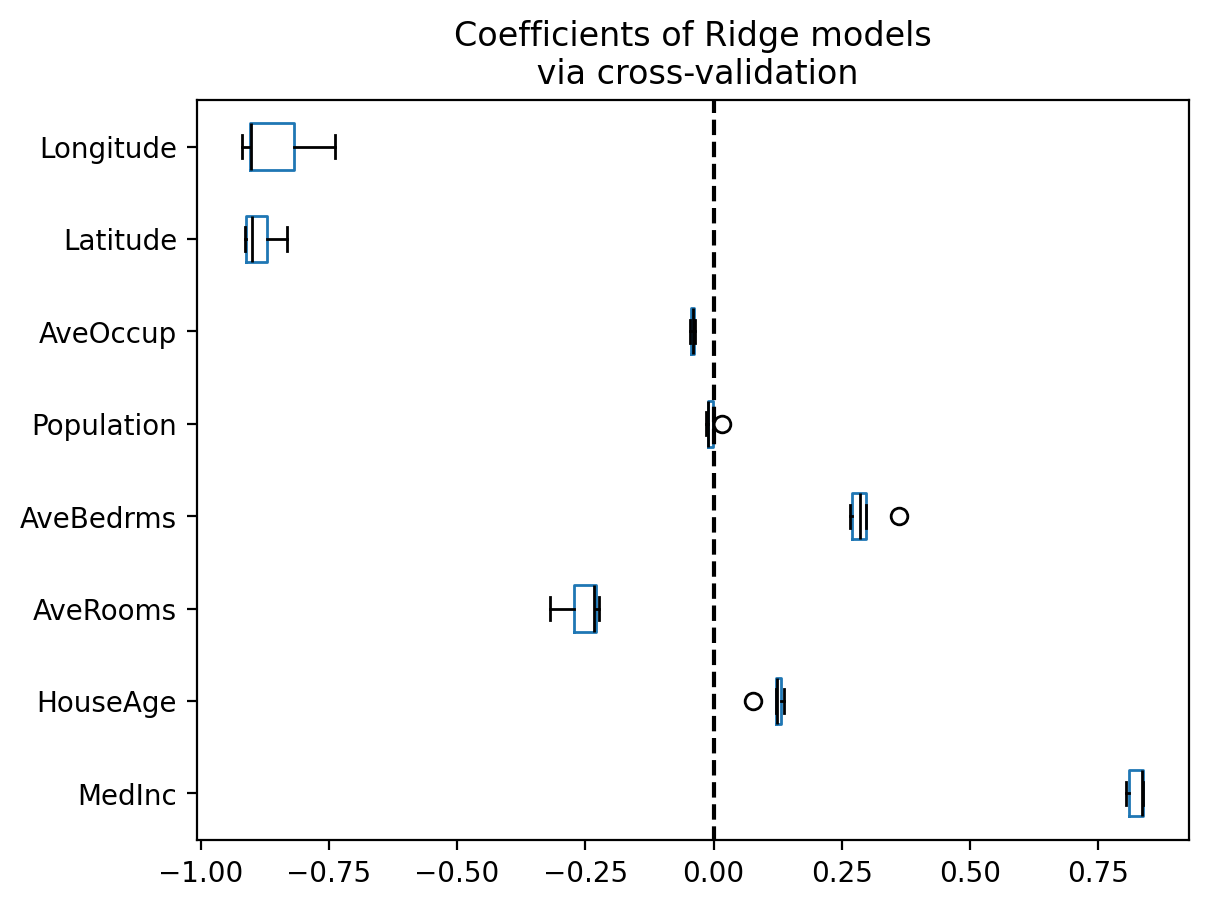

In [52]:
color = {"whiskers": "black", "medians": "black", "caps": "black"}
coefs.plot.box(vert=False, color=color)
plt.axvline(x=0, ymin=-1, ymax=1, color="black", linestyle="--")
_ = plt.title("Coefficients of Ridge models\n via cross-validation")

What do we see from these boxplots?

## Classifying recognizing hand-written digits

* [example from scikit website](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py)

In [53]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [54]:
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [55]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

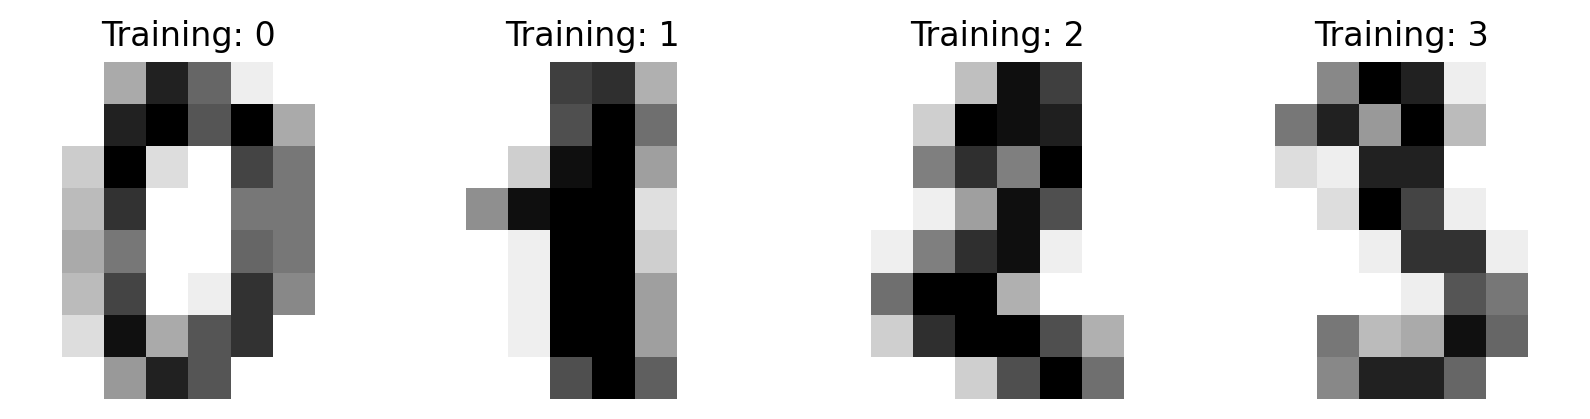

In [56]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [57]:
n_samples = len(digits.images)

In [58]:
n_samples

1797

In [59]:
# flatten the images
data = digits.images.reshape((n_samples, -1))

In [60]:
digits.images.reshape((n_samples,-1)).shape

(1797, 64)

In [61]:
digits.images.shape

(1797, 8, 8)

In [62]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)
clf_alt = lightgbm.LGBMClassifier()

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=True,
)

In [63]:
# Learn the digits on the train subset
clf.fit(X_train, y_train)
clf_alt.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
predicted_alt = clf_alt.predict(X_test)

/Users/luboshanus/.pyenv/versions/3.11.10/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 822
[LightGBM] [Info] Number of data points in the train set: 898, number of used features: 53
[LightGBM] [Info] Start training from score -2.235822
[LightGBM] [Info] Start training from score -2.334262
[LightGBM] [Info] Start training from score -2.334262
[LightGBM] [Info] Start training from score -2.215203
[LightGBM] [Info] Start training from score -2.278381
[LightGBM] [Info] Start training from score -2.393451
[LightGBM] [Info] Start training from score -2.405721
[LightGBM] [Info] Start training from score -2.334262
[LightGBM] [Info] Start training from score -2.256875
[LightGBM] [Info] Start training from score -2.256875
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

/Users/luboshanus/.pyenv/versions/3.11.10/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


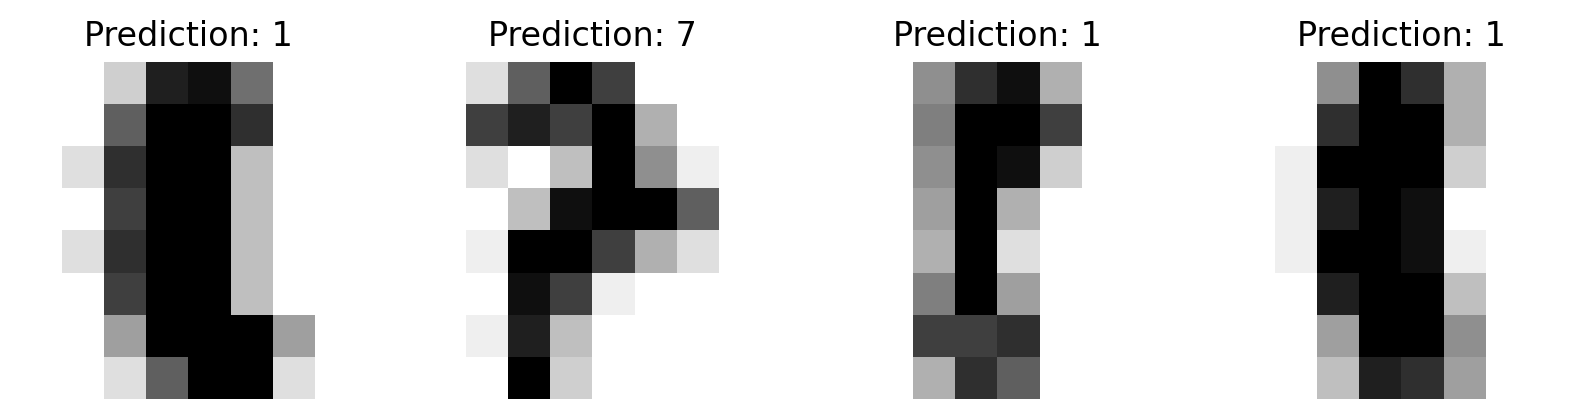

In [65]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

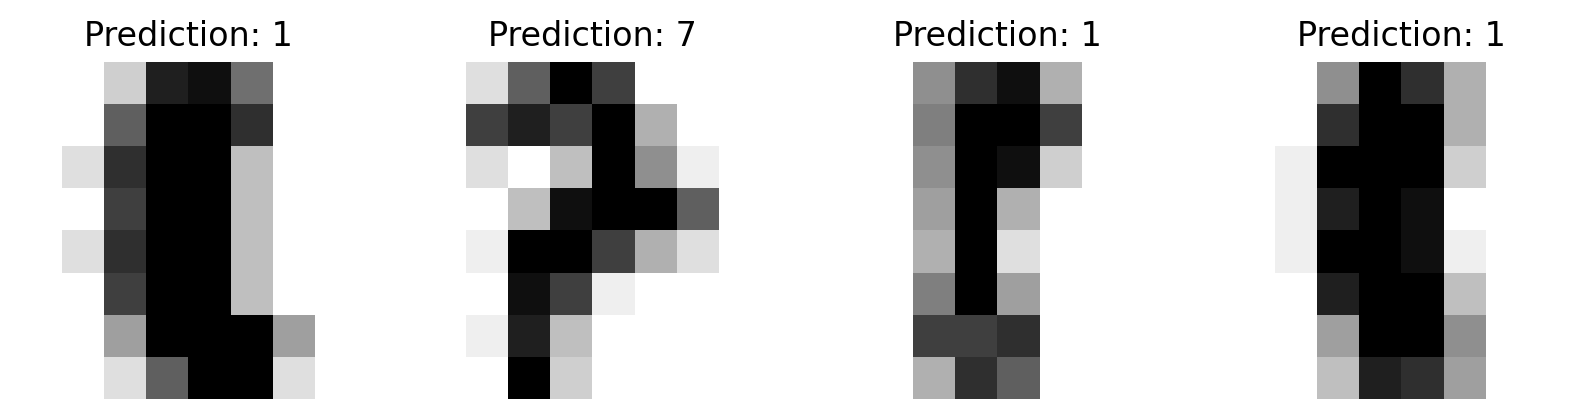

In [66]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

for ax, image, prediction in zip(axes, X_test, predicted_alt):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [67]:
# classification report -> good resource -> https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers?oldformat=true
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       0.96      1.00      0.98        95
           2       1.00      1.00      1.00        90
           3       1.00      0.99      0.99        85
           4       1.00      1.00      1.00        89
           5       1.00      0.99      0.99       100
           6       1.00      0.97      0.98       100
           7       0.99      0.99      0.99        92
           8       0.96      0.96      0.96        80
           9       0.97      0.98      0.97        86

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899



In [68]:
print(metrics.classification_report(y_test, predicted_alt))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        82
           1       0.90      0.97      0.93        95
           2       0.99      0.98      0.98        90
           3       0.95      0.94      0.95        85
           4       0.96      0.99      0.97        89
           5       1.00      0.95      0.97       100
           6       0.99      0.95      0.97       100
           7       0.95      0.93      0.94        92
           8       0.92      0.91      0.92        80
           9       0.92      0.97      0.94        86

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899



Confusion matrix:
[[82  0  0  0  0  0  0  0  0  0]
 [ 0 95  0  0  0  0  0  0  0  0]
 [ 0  0 90  0  0  0  0  0  0  0]
 [ 0  0  0 84  0  0  0  1  0  0]
 [ 0  0  0  0 89  0  0  0  0  0]
 [ 0  0  0  0  0 99  0  0  0  1]
 [ 0  2  0  0  0  0 97  0  1  0]
 [ 0  0  0  0  0  0  0 91  0  1]
 [ 0  2  0  0  0  0  0  0 77  1]
 [ 0  0  0  0  0  0  0  0  2 84]]


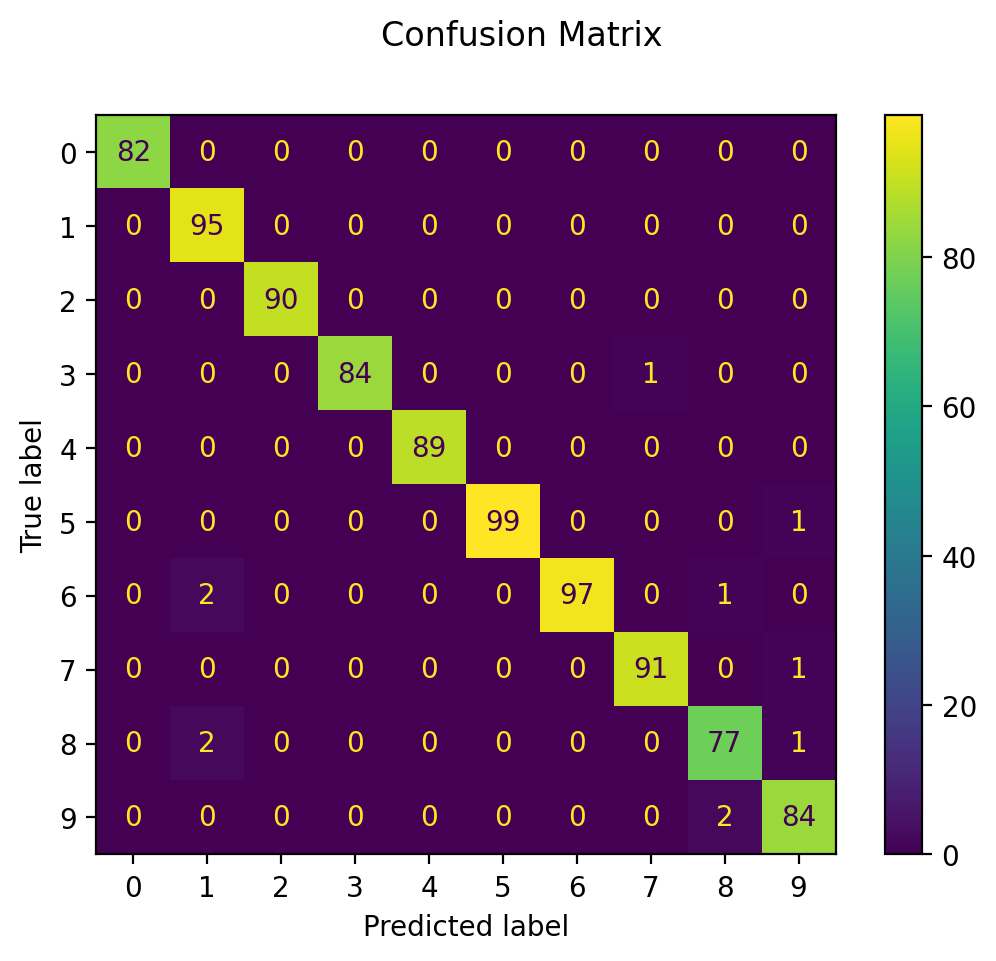

In [69]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()